_05839: Interactive Data Science_
_Instructor: John Stamper_

_Final Project_

__Topic: Plastic Pollution__<br>
__Submitted by: mmalani__ <br>

_Data and information reference: https://ourworldindata.org/plastic-pollution_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast

sns.set()
%matplotlib inline

import chardet
sns.set(style="whitegrid", color_codes=True)

In [2]:
# CORRELATION 01 : Per capita plastic waste vs. GDP per capita 2010

file_Correlate_01 = "PlasticPollution\per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv"
with open(file_Correlate_01, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Correlate_01 = pd.read_csv(file_Correlate_01, encoding='ISO-8859-1')

# Updated file
df_Correlate01 = df_og_Correlate_01.copy(deep=True)
df_Correlate01

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
2,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
3,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN
4,Afghanistan,AFG,2005,NaN,1286.793659,25654274.0,NaN
...,...,...,...,...,...,...,...
57073,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,NaN
57074,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,NaN
57075,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,NaN
57076,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [3]:
# Renaming columns
df_Correlate01 = df_Correlate01.rename(columns={'Entity': 'Country name',
                                                'GDP per capita, PPP (constant 2017 international $)': 
                                                'GDP per capita ($)'})
df_Correlate01

,Country name,Code,Year,Per capita mismanaged plastic waste,GDP per capita ($),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
2,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
3,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN
4,Afghanistan,AFG,2005,NaN,1286.793659,25654274.0,NaN
...,...,...,...,...,...,...,...
57073,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,NaN
57074,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,NaN
57075,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,NaN
57076,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [4]:
# Frop NaN value rows
df_Correlate01 = df_Correlate01.dropna(how = "all")

df_Correlate01

,Country name,Code,Year,Per capita mismanaged plastic waste,GDP per capita ($),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
2,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
3,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN
4,Afghanistan,AFG,2005,NaN,1286.793659,25654274.0,NaN
...,...,...,...,...,...,...,...
57073,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,NaN
57074,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,NaN
57075,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,NaN
57076,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [5]:
# Drop rows with NaN values for per capita mismanaged plastic waste
df_Correlate01 = df_Correlate01[df_Correlate01['Per capita mismanaged plastic waste'].notna()]
df_Correlate01 = df_Correlate01[df_Correlate01['GDP per capita ($)'].notna()]

df_Correlate01

,Country name,Code,Year,Per capita mismanaged plastic waste,GDP per capita ($),Population (historical estimates),Continent
582,Albania,ALB,2010,0.032,10749.487448,2948029.0,NaN
841,Algeria,DZA,2010,0.086,10970.706369,35977451.0,NaN
1473,Angola,AGO,2010,0.045,7692.434286,23356247.0,NaN
1854,Antigua and Barbuda,ATG,2010,0.051,18205.738533,88030.0,NaN
2144,Argentina,ARG,2010,0.026,23521.270175,40895751.0,NaN
...,...,...,...,...,...,...,...
53683,United Kingdom,GBR,2010,0.004,42089.013636,63459801.0,NaN
53943,United States,USA,2010,0.007,54315.912481,309011469.0,NaN
54343,Uruguay,URY,2010,0.024,19293.740798,3359273.0,NaN
54861,Vanuatu,VUT,2010,0.245,3088.978879,236216.0,NaN


In [6]:
# Drop Continent column
df_Correlate01 = df_Correlate01.drop('Continent', 1)

df_Correlate01

,Country name,Code,Year,Per capita mismanaged plastic waste,GDP per capita ($),Population (historical estimates)
582,Albania,ALB,2010,0.032,10749.487448,2948029.0
841,Algeria,DZA,2010,0.086,10970.706369,35977451.0
1473,Angola,AGO,2010,0.045,7692.434286,23356247.0
1854,Antigua and Barbuda,ATG,2010,0.051,18205.738533,88030.0
2144,Argentina,ARG,2010,0.026,23521.270175,40895751.0
...,...,...,...,...,...,...
53683,United Kingdom,GBR,2010,0.004,42089.013636,63459801.0
53943,United States,USA,2010,0.007,54315.912481,309011469.0
54343,Uruguay,URY,2010,0.024,19293.740798,3359273.0
54861,Vanuatu,VUT,2010,0.245,3088.978879,236216.0


In [7]:
# Drop for values year != 2010
df_Correlate01.drop(df_Correlate01[(df_Correlate01['Year']) != 2010].index, inplace = True)

df_Correlate01

,Country name,Code,Year,Per capita mismanaged plastic waste,GDP per capita ($),Population (historical estimates)
582,Albania,ALB,2010,0.032,10749.487448,2948029.0
841,Algeria,DZA,2010,0.086,10970.706369,35977451.0
1473,Angola,AGO,2010,0.045,7692.434286,23356247.0
1854,Antigua and Barbuda,ATG,2010,0.051,18205.738533,88030.0
2144,Argentina,ARG,2010,0.026,23521.270175,40895751.0
...,...,...,...,...,...,...
53683,United Kingdom,GBR,2010,0.004,42089.013636,63459801.0
53943,United States,USA,2010,0.007,54315.912481,309011469.0
54343,Uruguay,URY,2010,0.024,19293.740798,3359273.0
54861,Vanuatu,VUT,2010,0.245,3088.978879,236216.0


In [8]:
# Renaming columns
df_Correlate01 = df_Correlate01.rename(columns={'Entity': 'Country name', 
                    'Share of total mass input from rivers': 'Share of total mass input from rivers (%)'})

[None]

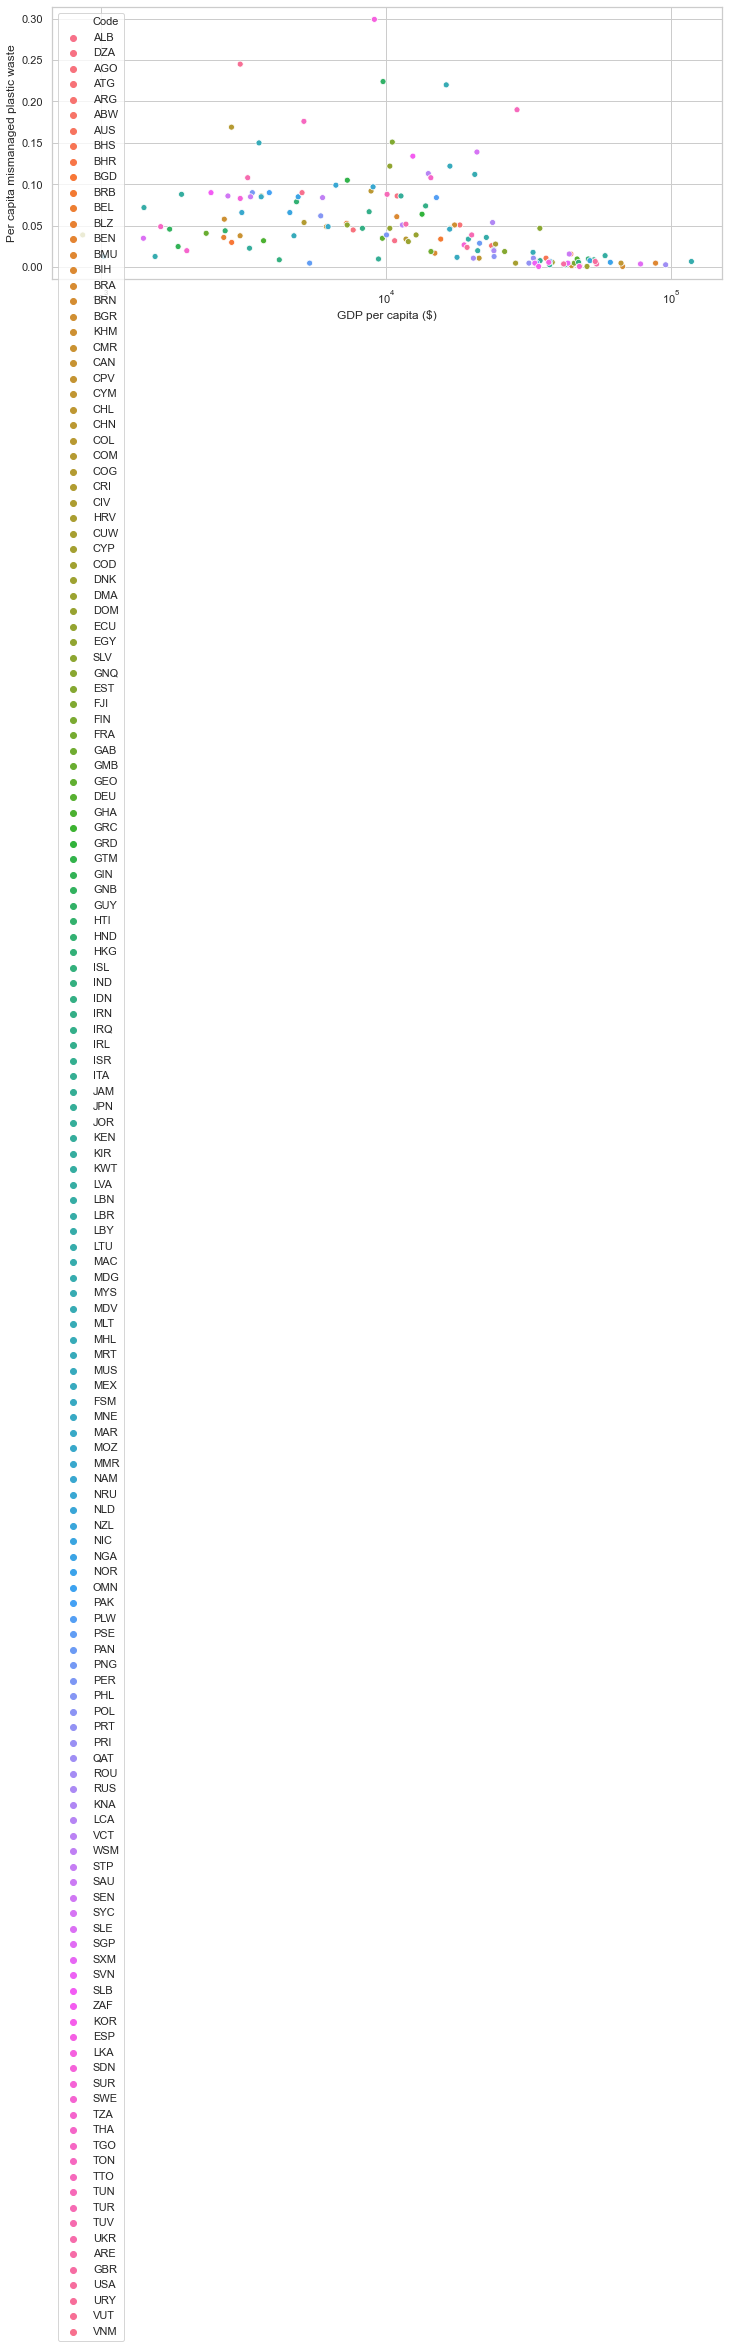

In [9]:
# Correlation 01 - Plot: Scatter Plot
plt.figure(figsize=(12, 5))

ax = sns.scatterplot(data=df_Correlate01, y="Per capita mismanaged plastic waste", 
                x="GDP per capita ($)", hue="Code")
ax.set(xscale = 'log')

__Correlation 01: Per capita plastic waste vs. GDP per capita 2010__
<br>
<font color=Gray>
- Here we see an inverse-U curve pattern. Mismanaged waste generation tends to be low at very low incomes (since per capita waste is small); it then rises towards middle incomes; and then falls again at higher incomes.<br>
- Countries around the middle of the global income spectrum therefore tend to have the highest per capita mismanaged plastic rates. This has typically occurred in countries that have rapidly industrialized, but failed to make progress in waste management at the same speed.</font>

__----------------------------------------------__

In [10]:
# CORRELATION 02 : Mismanaged plastic waste vs. coastal population, 2010

file_Correlate_02 = "PlasticPollution\coastal-population-vs-mismanaged-plastic.csv"
with open(file_Correlate_02, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_Correlate_02 = pd.read_csv(file_Correlate_02, encoding='ISO-8859-1')

# Updated file
df_Correlate02 = df_og_Correlate_02.copy(deep=True)
df_Correlate02

,Entity,Code,Year,Total mismanaged plastic waste in 2010,Coastal population,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,-10000,NaN,NaN,14737.0,NaN
2,Afghanistan,AFG,-9000,NaN,NaN,20405.0,NaN
3,Afghanistan,AFG,-8000,NaN,NaN,28253.0,NaN
4,Afghanistan,AFG,-7000,NaN,NaN,39120.0,NaN
...,...,...,...,...,...,...,...
55704,Zimbabwe,ZWE,2018,NaN,NaN,14438812.0,NaN
55705,Zimbabwe,ZWE,2019,NaN,NaN,14645473.0,NaN
55706,Zimbabwe,ZWE,2020,NaN,NaN,14862927.0,NaN
55707,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [11]:
# Drop rows with NaN values for per capita mismanaged plastic waste
df_Correlate02 = df_Correlate02[df_Correlate02['Total mismanaged plastic waste in 2010'].notna()]
df_Correlate02 = df_Correlate02[df_Correlate02['Coastal population'].notna()]

# Drop Continent column
df_Correlate02 = df_Correlate02.drop('Continent', 1)

df_Correlate02

,Entity,Code,Year,Total mismanaged plastic waste in 2010,Coastal population,Population (historical estimates)
520,Albania,ALB,2010,29705.0,2530533.0,2948029.0
779,Algeria,DZA,2010,520555.0,16556580.0,35977451.0
1411,Angola,AGO,2010,62528.0,3790041.0,23356247.0
1670,Anguilla,AIA,2010,52.0,14561.0,13436.0
1792,Antigua and Barbuda,ATG,2010,1253.0,66843.0,88030.0
...,...,...,...,...,...,...
52974,Uruguay,URY,2010,21562.0,2433597.0,3359273.0
53492,Vanuatu,VUT,2010,22478.0,251851.0,236216.0
53963,Venezuela,VEN,2010,102333.0,16094897.0,28439942.0
54222,Vietnam,VNM,2010,1833819.0,55858245.0,87967655.0


In [12]:
# Drop for values year != 2010
df_Correlate02.drop(df_Correlate02[(df_Correlate02['Year']) != 2010].index, inplace = True)

# Drop NaN values
df_Correlate02 = df_Correlate02.dropna(how = "all")

# Renaming columns
df_Correlate01 = df_Correlate01.rename(columns={'Entity': 'Country name'})

df_Correlate02

,Entity,Code,Year,Total mismanaged plastic waste in 2010,Coastal population,Population (historical estimates)
520,Albania,ALB,2010,29705.0,2530533.0,2948029.0
779,Algeria,DZA,2010,520555.0,16556580.0,35977451.0
1411,Angola,AGO,2010,62528.0,3790041.0,23356247.0
1670,Anguilla,AIA,2010,52.0,14561.0,13436.0
1792,Antigua and Barbuda,ATG,2010,1253.0,66843.0,88030.0
...,...,...,...,...,...,...
52974,Uruguay,URY,2010,21562.0,2433597.0,3359273.0
53492,Vanuatu,VUT,2010,22478.0,251851.0,236216.0
53963,Venezuela,VEN,2010,102333.0,16094897.0,28439942.0
54222,Vietnam,VNM,2010,1833819.0,55858245.0,87967655.0


[None, None]

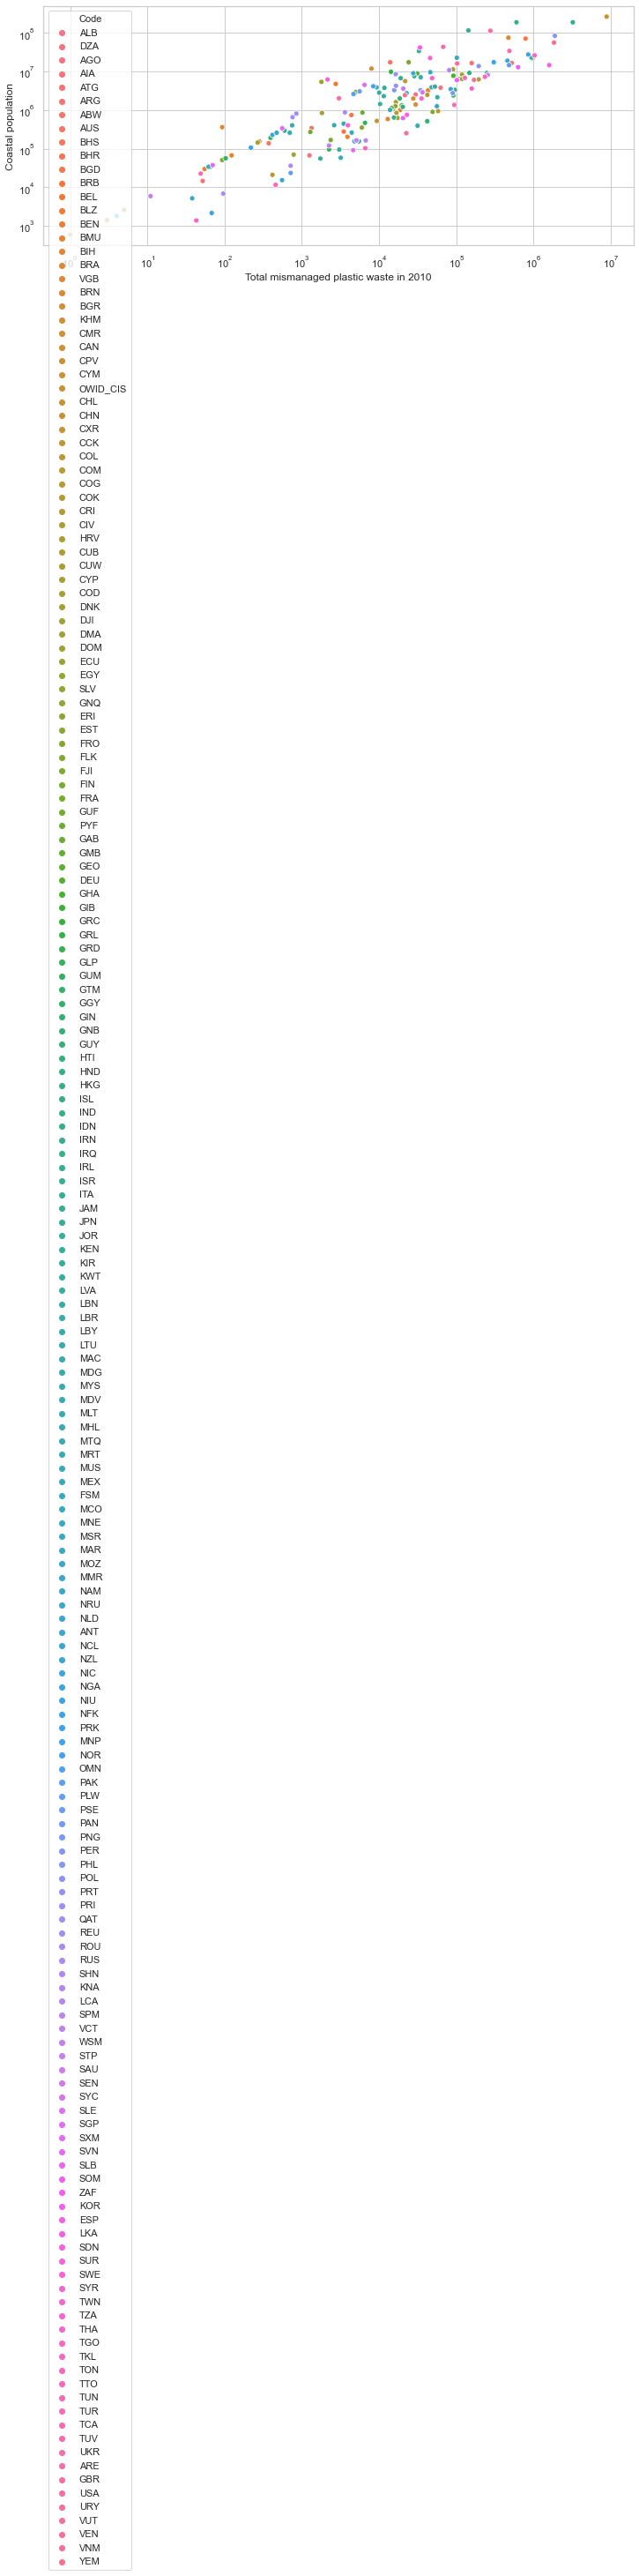

In [13]:
# Correlation 02 - Plot: Scatter Plot
plt.figure(figsize=(12, 5))

ax = sns.scatterplot(data=df_Correlate02, y="Coastal population", 
                x="Total mismanaged plastic waste in 2010", hue="Code")
ax.set(xscale = 'log', yscale="log")

__Correlation 02: Mismanaged plastic waste vs. coastal population, 2010__
<br>
<font color=Gray>
- It is also the case that countries with high levels of mismanaged waste also have large coastal populations<br>
- This exacerbates the challenge of ocean plastic pollution because poorly-managed waste is at high risk of entering the ocean.</font>

__----------------------------------------------__

In [14]:
# Exporting cleaned datafile in .csv format
# df_Correlate01.to_csv("per-capita-mismanaged-plastic-waste-vs-gdp-per-capita_Edited.csv")
# df_Correlate02.to_csv("coastal-population-vs-mismanaged-plastic_Edited.csv")